#### 相平面，零斜线

In [1]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import njit, prange
from scipy.optimize import root
import random
from nodes.HH import *
from nodes.Iz import *
from nodes.FHN import *
from nodes.ML import *
from nodes.HR import *

In [2]:
dt = 0.01
method = 'euler'    # （"euler", "rk4"）
N = 1

nodes = ML(N, method, dt)

nodes.params_nodes["Iex"] = 95.

In [3]:
for i in range(100_00):
    nodes()

mem = []
m = []
for i in range(1000_00):
    nodes()
    mem.append(nodes.vars_nodes[0].copy())
    m.append(nodes.vars_nodes[1].copy())

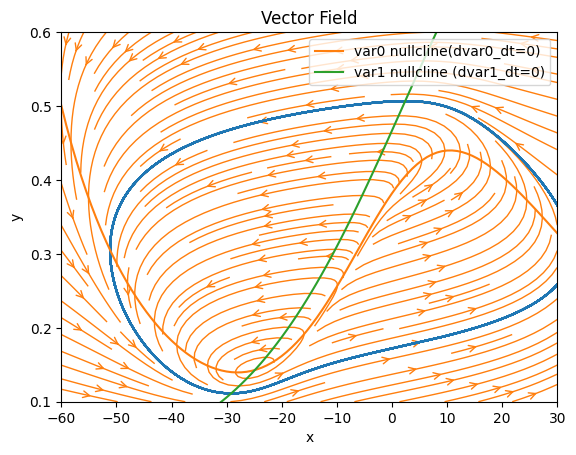

In [4]:
plt.plot(mem, m)
nullclines_list = nodes.cal_nullclines(x_dim=0, y_dim=1, x_range=(-60., 30.), N=100, plt_flag=True)
dX_dt, dY_dt, X, Y = nodes.cal_flow_field2D(select_dim=(0, 1), vars_lim=(-60., 30., 0.1, 0.6), N=500, plt_flag=True)
plt.xlim(-60, 30)
plt.ylim(0.1, 0.6)
plt.show()

#### HH模型

In [5]:
nodes = HH(N, method, dt)
nodes.params_nodes["Iex"] = 6.5
# nodes.vars_nodes[0] = 60
# nodes.vars_nodes[1] = 0.1
# nodes.vars_nodes[2] = 0.
# nodes.vars_nodes[3] = 0.

In [6]:
# for i in range(100_00):
#     nodes()

mem = []
m = []
for i in range(1000_00):
    nodes()
    mem.append(nodes.vars_nodes[0].copy())
    m.append(nodes.vars_nodes[1].copy())

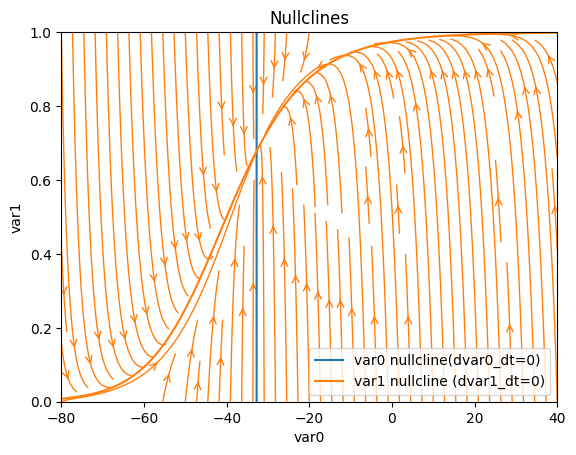

In [7]:
# plt.plot(mem, m)
dX_dt, dY_dt, X, Y = nodes.cal_flow_field2D(select_dim=(0, 1), vars_lim=(-80., 40., 0., 1.), N=500, plt_flag=True)
nullclines_list = nodes.cal_nullclines(x_dim=0, y_dim=1, x_range=(-80., 40.), N=500, plt_flag=True)
plt.xlim(-80., 40.)
plt.ylim(0., 1.)
plt.show()

#### Iz

In [8]:
nodes = Iz(N, method, dt)
nodes.params_nodes["Iex"] = 3.9
nodes.params_nodes["d"] = 2.
nodes.vars_nodes[0] = -58.5
nodes.vars_nodes[1] = -11.7

In [9]:
# for i in range(100_00):
#     nodes()

mem = []
m = []
for i in range(1000_00):
    nodes()
    mem.append(nodes.vars_nodes[0].copy())
    m.append(nodes.vars_nodes[1].copy())

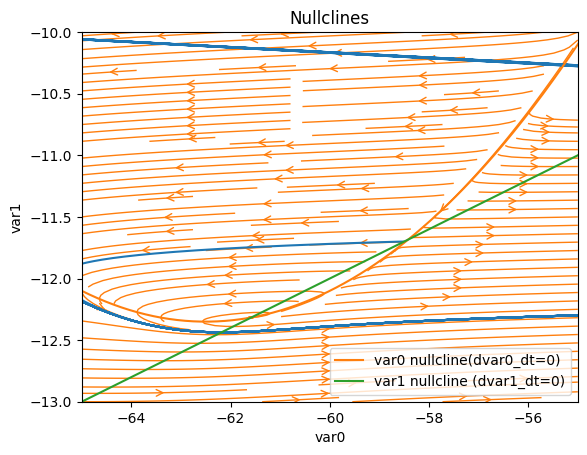

In [10]:
plt.plot(mem, m)
x1 = -65.
x2 = -55.
y1 = -13.
y2 = -10.
dX_dt, dY_dt, X, Y = nodes.cal_flow_field2D(select_dim=(0, 1), vars_lim=(x1, x2, y1, y2), N=500, plt_flag=True)
nullclines_list = nodes.cal_nullclines(x_dim=0, y_dim=1, x_range=(x1, -45.), N=500, plt_flag=True)
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.show()